In [6]:
from pytrends.request import TrendReq
# Login to Google. Only need to run this once
pytrend = TrendReq()
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
# keyword = 'cryptocurrency', cathegory = 16 (news), timeframe- limit range to 8 months to get daily data
pytrend.build_payload(kw_list=['bitcoin'], cat=16, timeframe='2017-11-15 2018-03-21')  

story_ggtrends_btc = pytrend.interest_over_time()
# Upsampling daily data to hourly data
story_ggtrends_btc = story_ggtrends_btc.resample('1d').pad().drop(['isPartial'], axis='columns')
story_ggtrends_btc.columns = ['SearchFrequency']

In [7]:
story_ggtrends_btc.to_csv('googletrends_bitcoin.csv')

            SearchFrequency
date                       
2017-11-15               14
2017-11-16               15
2017-11-17               16
2017-11-18               10
2017-11-19               10
2017-11-20               15
2017-11-21               16
2017-11-22               14
2017-11-23               12
2017-11-24               11
2017-11-25               11
2017-11-26               18
2017-11-27               26
2017-11-28               29
2017-11-29               53
2017-11-30               45
2017-12-01               30
2017-12-02               21
2017-12-03               20
2017-12-04               28
2017-12-05               27
2017-12-06               36
2017-12-07               72
2017-12-08               64
2017-12-09               41
2017-12-10               41
2017-12-11               50
2017-12-12               47
2017-12-13               40
2017-12-14               34
...                     ...
2018-02-20               17
2018-02-21               20
2018-02-22          

In [10]:
story_ggtrends_btc.to_csv('googletrends_bitcoin.csv')

In [11]:
import cryptocompare
cryptocompare.get_price('BTC')

{'BTC': {'EUR': 6335.34}}

In [25]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime

# Indicate how many rows of data here
lim = '15000' 
story_coin = ['BTC']
story_data = pd.DataFrame()
for i in story_coin:
    URL = 'https://min-api.cryptocompare.com/data/histohour?fsym='+i+'&tsym=USD&limit='+lim
    data = requests.get(URL)
    json_data = data.json()
    table = json_normalize(json_data, 'Data').set_index('time')
    table.index = pd.to_datetime(table.index ,unit='s')
    story_data = pd.concat([story_data, table.high], axis=1)
story_data.columns = story_coin

In [26]:
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime

# Indicate how many rows of data here
lim = '15000' 
story_coin = ['ETH']
story_data = pd.DataFrame()
for i in story_coin:
    URL = 'https://min-api.cryptocompare.com/data/histohour?fsym='+i+'&tsym=USD&limit='+lim
    data = requests.get(URL)
    json_data = data.json()
    table = json_normalize(json_data, 'Data').set_index('time')
    table.index = pd.to_datetime(table.index ,unit='s')
    story_data = pd.concat([story_data, table.high], axis=1)
story_data.columns = story_coin

In [27]:
print(story_coin)

['ETH']


In [14]:
table.head(20)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2018-01-02 19:00:00,855.50,857.71,819.55,856.06,84333.60,70786022.44
2018-01-02 20:00:00,859.22,859.50,846.42,855.44,30376.02,25909834.99
2018-01-02 21:00:00,866.22,870.53,856.35,859.23,24866.23,21513217.68
2018-01-02 22:00:00,856.81,868.69,847.57,866.22,23818.78,20363606.81
2018-01-02 23:00:00,861.97,866.80,856.64,856.85,22426.46,19327391.36
2018-01-03 00:00:00,879.21,880.22,860.47,861.97,43501.39,38015286.32
2018-01-03 01:00:00,868.50,884.65,864.36,879.21,52045.84,45354722.99
2018-01-03 02:00:00,861.46,869.90,859.27,868.43,33422.93,28889023.32
2018-01-03 03:00:00,860.76,869.73,857.50,861.38,26063.87,22432814.22


In [28]:
table.index

DatetimeIndex(['2018-01-02 19:00:00', '2018-01-02 20:00:00',
               '2018-01-02 21:00:00', '2018-01-02 22:00:00',
               '2018-01-02 23:00:00', '2018-01-03 00:00:00',
               '2018-01-03 01:00:00', '2018-01-03 02:00:00',
               '2018-01-03 03:00:00', '2018-01-03 04:00:00',
               ...
               '2018-03-26 18:00:00', '2018-03-26 19:00:00',
               '2018-03-26 20:00:00', '2018-03-26 21:00:00',
               '2018-03-26 22:00:00', '2018-03-26 23:00:00',
               '2018-03-27 00:00:00', '2018-03-27 01:00:00',
               '2018-03-27 02:00:00', '2018-03-27 03:00:00'],
              dtype='datetime64[ns]', name='time', length=2001, freq=None)

In [36]:
stuff = table['close'].loc['2017-11-15':'2018-03-21']

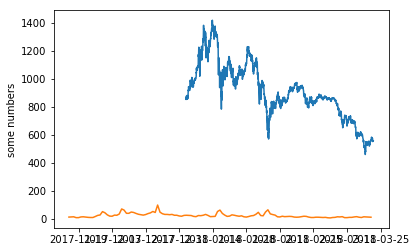

In [37]:
import matplotlib.pyplot as plt
plt.plot(stuff)
plt.plot(story_ggtrends_btc)
plt.ylabel('some numbers')
plt.show()

In [ ]:
#OK I need to slice the data frame and then plot it. this is in blue
#I need to the plot the search frequency, this is in orange